# Analyticall generate the GMM model pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Analyticall generate the GMM model pdf
# Parameters for the three Gaussians
mean1, std1 = 0, 1
mean2, std2 = -2, 0.5
mean3, std3 = 3, 2

# Weights (you can adjust these based on your data)
w1, w2, w3 = 0.4, 0.3, 0.3
total_points = 1000  # Total number of data points

# Generate data points
x = np.linspace(-10, 10, total_points)

# Compute PDF for each Gaussian
pdf1 = w1 * norm.pdf(x, mean1, std1)
pdf2 = w2 * norm.pdf(x, mean2, std2)
pdf3 = w3 * norm.pdf(x, mean3, std3)

# Combine the PDFs
gmm_pdf = pdf1 + pdf2 + pdf3

# Plot the GMM PDF
plt.figure(figsize=(8, 6))
plt.plot(x, gmm_pdf, label='GMM PDF')
plt.plot(x, pdf1, label='Gaussian 1')
plt.plot(x, pdf2, label='Gaussian 2')
plt.plot(x, pdf3, label='Gaussian 3')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Mixture Model PDF')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sample from the GMM and store the samples in np.vectors

total_samples = 1000  # Total number of samples
# Generate samples from each Gaussian
samples1 = np.random.normal(loc=mean1, scale=std1, size=int(w1 * total_samples))
samples2 = np.random.normal(loc=mean2, scale=std2, size=int(w2 * total_samples))
samples3 = np.random.normal(loc=mean3, scale=std3, size=int(w3 * total_samples))

# Combine the samples
gmm_samples = np.concatenate((samples1, samples2, samples3))

# Now 'gmm_samples' contains samples from the GMM
print("Sampled GMM data shape:", gmm_samples.shape)

In [ ]:
# Generate various plots for differnt sample sizes and show the convergence to the actual pdf

# True GMM PDF
def true_gmm_pdf(x):
    return w1 * norm.pdf(x, mean1, std1) + w2 * norm.pdf(x, mean2, std2) + w3 * norm.pdf(x, mean3, std3)

# Sample sizes for convergence
sample_sizes = [100, 1000, 10000]


# Generate plots
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes):
    # Generate samples
    samples1 = np.random.normal(loc=mean1, scale=std1, size=int(w1 * size))
    samples2 = np.random.normal(loc=mean2, scale=std2, size=int(w2 * size))
    samples3 = np.random.normal(loc=mean3, scale=std3, size=int(w3 * size))
    gmm_samples = np.concatenate((samples1, samples2, samples3))

    # Compute histogram
    hist, bins = np.histogram(gmm_samples, bins=50, density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot histogram
    plt.subplot(2, 2, i + 1)
    plt.plot(bin_centers, hist, label=f'Sample Size = {size}')
    plt.plot(bin_centers, true_gmm_pdf(bin_centers), '--', label='True GMM PDF')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title(f'Sample Size = {size}')
    plt.legend()

plt.tight_layout()
plt.show()

2
2
1


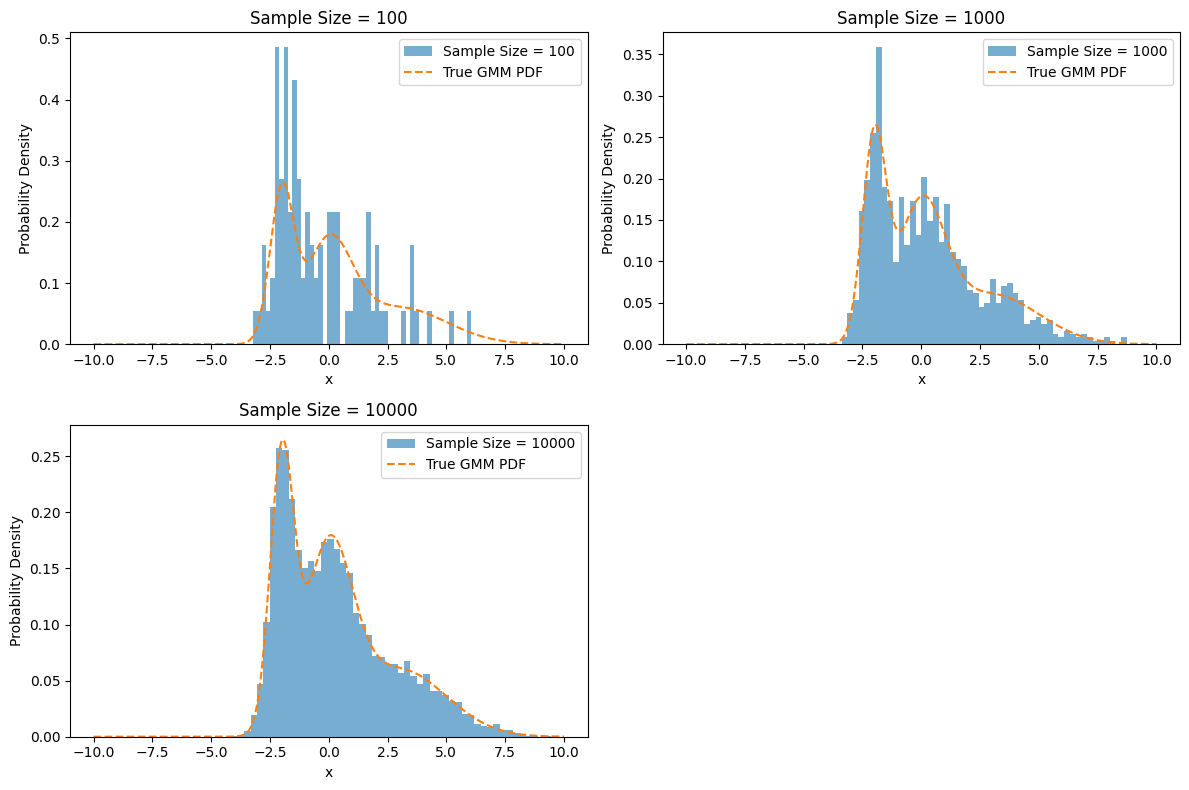

In [ ]:
#Question 2 with the steps

# Coefficients (probabilities) for each Gaussian
coefficients = [0.4, 0.3, 0.3]

# Sample sizes for convergence
sample_sizes = [100, 1000, 10000]

# Generate samples
def generate_samples(size):
    # Flip the coin to choose a Gaussian mode
    chosen_mode = np.random.choice(3, size=size, p=coefficients)

    # Sample from the chosen Gaussian
    samples = np.zeros(size)
    for i, mode in enumerate(chosen_mode):
        if mode == 0:
            samples[i] = np.random.normal(loc=mean1, scale=std1)
        elif mode == 1:
            samples[i] = np.random.normal(loc=mean2, scale=std2)
        else:
            samples[i] = np.random.normal(loc=mean3, scale=std3)
    return samples

# Plot histograms
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes):
    samples = generate_samples(size)
    plt.subplot(2, 2, i + 1)
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f'Sample Size = {size}')
    x = np.linspace(-10, 10, 1000)
    true_gmm_pdf = coefficients[0] * norm.pdf(x, mean1, std1) + \
                   coefficients[1] * norm.pdf(x, mean2, std2) + \
                   coefficients[2] * norm.pdf(x, mean3, std3)
    plt.plot(x, true_gmm_pdf, '--', label='True GMM PDF')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title(f'Sample Size = {size}')
    plt.legend()

plt.tight_layout()
plt.show()

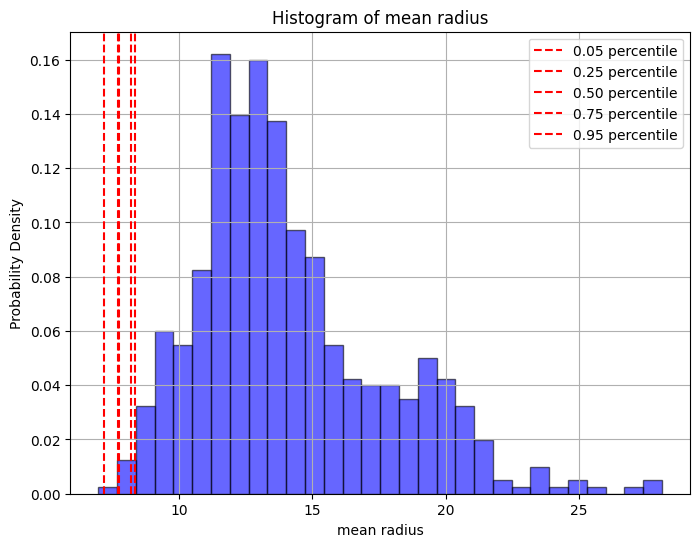

0.05 percentile: 7.18
0.25 percentile: 7.71
0.50 percentile: 7.76
0.75 percentile: 8.20
0.95 percentile: 8.36


In [ ]:
# Import modules/libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer(as_frame=True)
X = data.data  # Features
feature_names = data.feature_names

# Choose a specific feature (e.g., 'mean radius')
chosen_feature = 'mean radius'
feature_values = X[chosen_feature]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(feature_values, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel(chosen_feature)
plt.ylabel('Probability Density')
plt.title(f'Histogram of {chosen_feature}')
plt.grid(True)

# Calculate p-values
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
p_values = np.percentile(feature_values, percentiles)
for p, val in zip(percentiles, p_values):
    plt.axvline(val, color='r', linestyle='--', label=f'{p:.2f} percentile')

plt.legend()
plt.show()

# Print p-values
for p, val in zip(percentiles, p_values):
    print(f'{p:.2f} percentile: {val:.2f}')

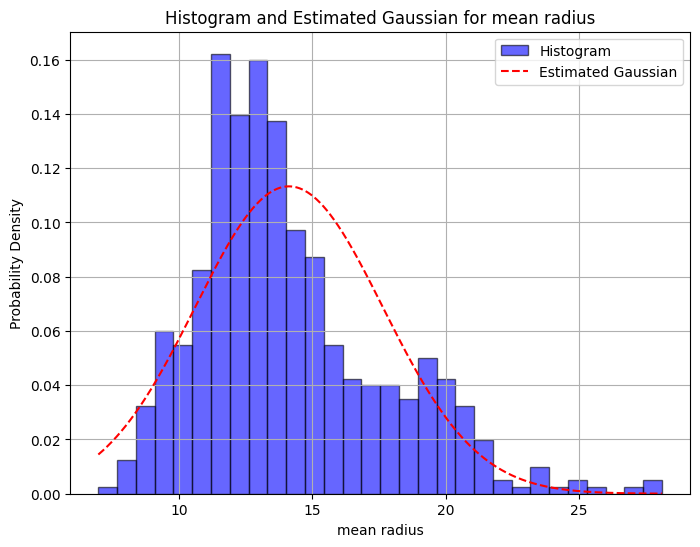

In [ ]:
# Derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram

# Calculate sample mean and sample standard deviation
sample_mean = np.mean(feature_values)
sample_std = np.std(feature_values)

# Create an estimated Gaussian distribution
x_values = np.linspace(min(feature_values), max(feature_values), 1000)
gaussian_pdf = (1 / (np.sqrt(2 * np.pi * sample_std**2))) * np.exp(-(x_values - sample_mean)**2 / (2 * sample_std**2))

# Plot histogram and estimated Gaussian
plt.figure(figsize=(8, 6))
plt.hist(feature_values, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Histogram')
plt.plot(x_values, gaussian_pdf, '--', color='r', label='Estimated Gaussian')
plt.xlabel(chosen_feature)
plt.ylabel('Probability Density')
plt.title(f'Histogram and Estimated Gaussian for {chosen_feature}')
plt.legend()
plt.grid(True)
plt.show()

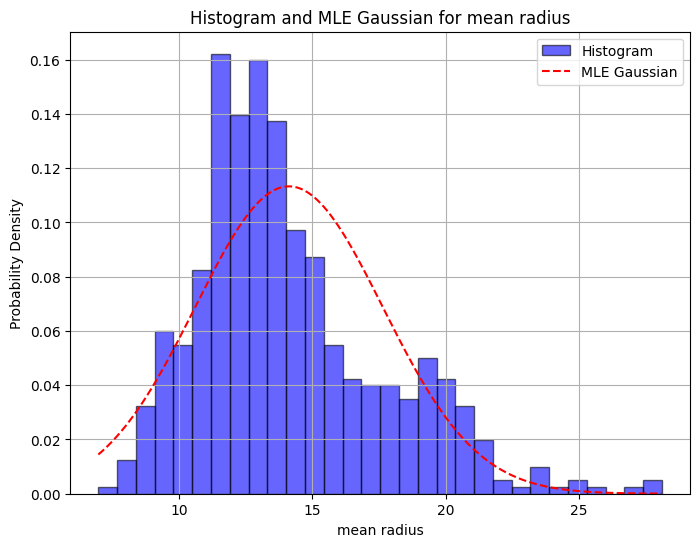

In [ ]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)
# Create an estimated Gaussian distribution using MLE estimates
x_values = np.linspace(min(feature_values), max(feature_values), 1000)
gaussian_mle_pdf = (1 / (np.sqrt(2 * np.pi * sample_std**2))) * np.exp(-(x_values - sample_mean)**2 / (2 * sample_std**2))

# Plot histogram, MLE Gaussian, and true Gaussian
plt.figure(figsize=(8, 6))
plt.hist(feature_values, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label='Histogram')
plt.plot(x_values, gaussian_mle_pdf, '--', color='r', label='MLE Gaussian')
plt.xlabel(chosen_feature)
plt.ylabel('Probability Density')
plt.title(f'Histogram and MLE Gaussian for {chosen_feature}')
plt.legend()
plt.grid(True)
plt.show()